In [218]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import math

In [2]:
dataset = pd.read_csv('Data.csv')

## Data Analysis

In [3]:
dataset.head(10)

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   
5  Afghanistan  2010  Developing              58.8            279.0   
6  Afghanistan  2009  Developing              58.6            281.0   
7  Afghanistan  2008  Developing              58.1            287.0   
8  Afghanistan  2007  Developing              57.5            295.0   
9  Afghanistan  2006  Developing              57.3            295.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   
5             74     0.01               79.679367         66.0      1989  ...   
6             77     0.01               56.762217         63.0      2861  ...   
7             80     0.03               25.873925         64.0      1599  ...   
8             82     0.02               10.910156         63.0      1141  ...   
9             84     0.03               17.171518         64.0      1990  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   
5   66.0               9.20         66.0        0.1  553.328940   2883167.0   
6   63.0               9.42         63.0        0.1  445.893298    284331.0   
7   64.0               8.33         64.0        0.1  373.361116   2729431.0   
8   63.0               6.73         63.0        0.1  369.835796  26616792.0   
9   58.0               7.43         58.0        0.1  272.563770   2589345.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   
5                   18.4                 18.4   
6                   18.6                 18.7   
7                   18.8                 18.9   
8                   19.0                 19.1   
9                   19.2                 19.3   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  
5                            0.448        9.2  
6                            0.434        8.9  
7                            0.433        8.7  
8                            0.415        8.4  
9                            0.405        8.1  

[10 rows x 22 columns]

In [4]:
pd.DataFrame.info(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
pd.DataFrame.describe(dataset)

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

## Feature Engineering

In [6]:
mvalues = pd.isnull(dataset["Adult Mortality"])
#Having a closer look at the records which do not have adult mortality data

In [7]:
dataset[mvalues]

Country  Year      Status  Life expectancy   \
624            Cook Islands  2013  Developing               NaN   
769                Dominica  2013  Developing               NaN   
1650       Marshall Islands  2013  Developing               NaN   
1715                 Monaco  2013  Developing               NaN   
1812                  Nauru  2013  Developing               NaN   
1909                   Niue  2013  Developing               NaN   
1958                  Palau  2013  Developing               NaN   
2167  Saint Kitts and Nevis  2013  Developing               NaN   
2216             San Marino  2013  Developing               NaN   
2713                 Tuvalu  2013  Developing               NaN   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
624               NaN              0     0.01                0.000000   
769               NaN              0     0.01               11.419555   
1650              NaN              0     0.01              871.878317   
1715              NaN              0     0.01                0.000000   
1812              NaN              0     0.01               15.606596   
1909              NaN              0     0.01                0.000000   
1958              NaN              0      NaN              344.690631   
2167              NaN              0     8.54                0.000000   
2216              NaN              0     0.01                0.000000   
2713              NaN              0     0.01               78.281203   

      Hepatitis B  Measles   ...  Polio  Total expenditure  Diphtheria   \
624          98.0         0  ...   98.0               3.58         98.0   
769          96.0         0  ...   96.0               5.58         96.0   
1650          8.0         0  ...   79.0              17.24         79.0   
1715         99.0         0  ...   99.0               4.30         99.0   
1812         87.0         0  ...   87.0               4.65         87.0   
1909         99.0         0  ...   99.0               7.20         99.0   
1958         99.0         0  ...   99.0               9.27         99.0   
2167         97.0         0  ...   96.0               6.14         96.0   
2216         69.0         0  ...   69.0               6.50         69.0   
2713          9.0         0  ...    9.0              16.61          9.0   

       HIV/AIDS          GDP  Population   thinness  1-19 years  \
624         0.1          NaN         NaN                    0.1   
769         0.1   722.756650         NaN                    2.7   
1650        0.1  3617.752354         NaN                    0.1   
1715        0.1          NaN         NaN                    NaN   
1812        0.1   136.183210         NaN                    0.1   
1909        0.1          NaN         NaN                    0.1   
1958        0.1  1932.122370       292.0                    0.1   
2167        0.1          NaN         NaN                    3.7   
2216        0.1          NaN         NaN                    NaN   
2713        0.1  3542.135890      1819.0                    0.2   

       thinness 5-9 years  Income composition of resources  Schooling  
624                   0.1                              NaN        NaN  
769                   2.6                            0.721       12.7  
1650                  0.1                              NaN        0.0  
1715                  NaN                              NaN        NaN  
1812                  0.1                              NaN        9.6  
1909                  0.1                              NaN        NaN  
1958                  0.1                            0.779       14.2  
2167                  3.6                            0.749       13.4  
2216                  NaN                              NaN       15.1  
2713                  0.1                              NaN        0.0  

[10 rows x 22 columns]

In [8]:
dataset.loc[dataset["Country"] == "Saint Kitts and Nevis"]

Country  Year      Status  Life expectancy   \
2167  Saint Kitts and Nevis  2013  Developing               NaN   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
2167              NaN              0     8.54                     0.0   

      Hepatitis B  Measles   ...  Polio  Total expenditure  Diphtheria   \
2167         97.0         0  ...   96.0               6.14         96.0   

       HIV/AIDS  GDP  Population   thinness  1-19 years   thinness 5-9 years  \
2167        0.1  NaN         NaN                    3.7                  3.6   

      Income composition of resources  Schooling  
2167                            0.749       13.4  

[1 rows x 22 columns]

There is only one record of all the above countries and hence we would be removing these records from our dataset
Also, they do not have life expectancy data in them.

In [9]:
dataset = dataset[dataset['Adult Mortality'].notna()]
#Removing records with NaN value of Adult Mortality

In [10]:
pd.DataFrame.info(dataset)
#Further analysing the missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10   BMI                             2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

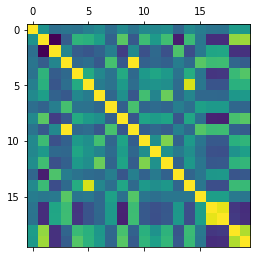

In [11]:
plt.matshow(dataset.corr())
plt.show()
#Trying to decide whether some variables are very strongly related and hence can be removed

In [12]:
mvalues = pd.isnull(dataset["Polio"])
dataset[mvalues]
dataset = dataset[dataset['Polio'].notna()]
pd.DataFrame.info(dataset)
#Removed Records where data for Polio has not been given

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2909 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2909 non-null   object 
 1   Year                             2909 non-null   int64  
 2   Status                           2909 non-null   object 
 3   Life expectancy                  2909 non-null   float64
 4   Adult Mortality                  2909 non-null   float64
 5   infant deaths                    2909 non-null   int64  
 6   Alcohol                          2728 non-null   float64
 7   percentage expenditure           2909 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2909 non-null   int64  
 10   BMI                             2888 non-null   float64
 11  under-five deaths                2909 non-null   int64  
 12  Polio               

In [241]:
dataset.duplicated().sum()
#There are no duplicate values in the dataset, which is good!

0

In [24]:
#Using KNNImputer to fill the missing values (as there a large number of missing values we cannot remove all the rows)
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 2)
dataset_filled = imputer.fit_transform(dataset[["Year","Life expectancy ","Adult Mortality","infant deaths","Alcohol","percentage expenditure","Hepatitis B","Measles "," BMI ","under-five deaths ","Polio","Total expenditure","Diphtheria "," HIV/AIDS","GDP","Population"," thinness  1-19 years"," thinness 5-9 years","Income composition of resources","Schooling"]])

In [28]:
print(dataset_filled)

[[2.015e+03 6.500e+01 2.630e+02 ... 1.730e+01 4.790e-01 1.010e+01]
 [2.014e+03 5.990e+01 2.710e+02 ... 1.750e+01 4.760e-01 1.000e+01]
 [2.013e+03 5.990e+01 2.680e+02 ... 1.770e+01 4.700e-01 9.900e+00]
 ...
 [2.002e+03 4.480e+01 7.300e+01 ... 1.300e+00 4.270e-01 1.000e+01]
 [2.001e+03 4.530e+01 6.860e+02 ... 1.700e+00 4.270e-01 9.800e+00]
 [2.000e+03 4.600e+01 6.650e+02 ... 1.120e+01 4.340e-01 9.800e+00]]


In [30]:
#Converting it back to a Pandas dataframe
dataframe_filled = pd.DataFrame(dataset_filled, columns = ["Year","Life expectancy ","Adult Mortality","infant deaths","Alcohol","percentage expenditure","Hepatitis B","Measles "," BMI ","under-five deaths ","Polio","Total expenditure","Diphtheria "," HIV/AIDS","GDP","Population"," thinness  1-19 years"," thinness 5-9 years","Income composition of resources","Schooling"])
dataframe_filled

Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0     2015.0              65.0            263.0           62.0     0.01   
1     2014.0              59.9            271.0           64.0     0.01   
2     2013.0              59.9            268.0           66.0     0.01   
3     2012.0              59.5            272.0           69.0     0.01   
4     2011.0              59.2            275.0           71.0     0.01   
...      ...               ...              ...            ...      ...   
2904  2004.0              44.3            723.0           27.0     4.36   
2905  2003.0              44.5            715.0           26.0     4.06   
2906  2002.0              44.8             73.0           25.0     4.43   
2907  2001.0              45.3            686.0           25.0     1.72   
2908  2000.0              46.0            665.0           24.0     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         65.0    1154.0   19.1   
1                  73.523582         62.0     492.0   18.6   
2                  73.219243         64.0     430.0   18.1   
3                  78.184215         67.0    2787.0   17.6   
4                   7.097109         68.0    3013.0   17.2   
...                      ...          ...       ...    ...   
2904                0.000000         68.0      31.0   27.1   
2905                0.000000          7.0     998.0   26.7   
2906                0.000000         73.0     304.0   26.3   
2907                0.000000         76.0     529.0   25.9   
2908                0.000000         79.0    1483.0   25.5   

      under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0                   83.0    6.0               8.16         65.0        0.1   
1                   86.0   58.0               8.18         62.0        0.1   
2                   89.0   62.0               8.13         64.0        0.1   
3                   93.0   67.0               8.52         67.0        0.1   
4                   97.0   68.0               7.87         68.0        0.1   
...                  ...    ...                ...          ...        ...   
2904                42.0   67.0               7.13         65.0       33.6   
2905                41.0    7.0               6.52         68.0       36.7   
2906                40.0   73.0               6.53         71.0       39.8   
2907                39.0   76.0               6.16         75.0       42.1   
2908                39.0   78.0               7.10         78.0       43.5   

             GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0     584.259210  33736494.0                   17.2                 17.3   
1     612.696514    327582.0                   17.5                 17.5   
2     631.744976  31731688.0                   17.7                 17.7   
3     669.959000   3696958.0                   17.9                 18.0   
4      63.537231   2978599.0                   18.2                 18.2   
...          ...         ...                    ...                  ...   
2904  454.366654  12777511.0                    9.4                  9.4   
2905  453.351155  12633897.0                    9.8                  9.9   
2906   57.348340    125525.0                    1.2                  1.3   
2907  548.587312  12366165.0                    1.6                  1.7   
2908  547.358878  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2904                            0.407        9.2  
2905                            0.418        9.5  
2906                            0.427       10.0  
29

In [31]:
pd.DataFrame.info(dataframe_filled)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2909 non-null   float64
 1   Life expectancy                  2909 non-null   float64
 2   Adult Mortality                  2909 non-null   float64
 3   infant deaths                    2909 non-null   float64
 4   Alcohol                          2909 non-null   float64
 5   percentage expenditure           2909 non-null   float64
 6   Hepatitis B                      2909 non-null   float64
 7   Measles                          2909 non-null   float64
 8    BMI                             2909 non-null   float64
 9   under-five deaths                2909 non-null   float64
 10  Polio                            2909 non-null   float64
 11  Total expenditure                2909 non-null   float64
 12  Diphtheria          

In [33]:
#Adding the non-numerical data columns
dataframe_filled['Country'] = dataset['Country'].values
dataframe_filled

Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0     2015.0              65.0            263.0           62.0     0.01   
1     2014.0              59.9            271.0           64.0     0.01   
2     2013.0              59.9            268.0           66.0     0.01   
3     2012.0              59.5            272.0           69.0     0.01   
4     2011.0              59.2            275.0           71.0     0.01   
...      ...               ...              ...            ...      ...   
2904  2004.0              44.3            723.0           27.0     4.36   
2905  2003.0              44.5            715.0           26.0     4.06   
2906  2002.0              44.8             73.0           25.0     4.43   
2907  2001.0              45.3            686.0           25.0     1.72   
2908  2000.0              46.0            665.0           24.0     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         65.0    1154.0   19.1   
1                  73.523582         62.0     492.0   18.6   
2                  73.219243         64.0     430.0   18.1   
3                  78.184215         67.0    2787.0   17.6   
4                   7.097109         68.0    3013.0   17.2   
...                      ...          ...       ...    ...   
2904                0.000000         68.0      31.0   27.1   
2905                0.000000          7.0     998.0   26.7   
2906                0.000000         73.0     304.0   26.3   
2907                0.000000         76.0     529.0   25.9   
2908                0.000000         79.0    1483.0   25.5   

      under-five deaths   ...  Total expenditure  Diphtheria    HIV/AIDS  \
0                   83.0  ...               8.16         65.0        0.1   
1                   86.0  ...               8.18         62.0        0.1   
2                   89.0  ...               8.13         64.0        0.1   
3                   93.0  ...               8.52         67.0        0.1   
4                   97.0  ...               7.87         68.0        0.1   
...                  ...  ...                ...          ...        ...   
2904                42.0  ...               7.13         65.0       33.6   
2905                41.0  ...               6.52         68.0       36.7   
2906                40.0  ...               6.53         71.0       39.8   
2907                39.0  ...               6.16         75.0       42.1   
2908                39.0  ...               7.10         78.0       43.5   

             GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0     584.259210  33736494.0                   17.2                 17.3   
1     612.696514    327582.0                   17.5                 17.5   
2     631.744976  31731688.0                   17.7                 17.7   
3     669.959000   3696958.0                   17.9                 18.0   
4      63.537231   2978599.0                   18.2                 18.2   
...          ...         ...                    ...                  ...   
2904  454.366654  12777511.0                    9.4                  9.4   
2905  453.351155  12633897.0                    9.8                  9.9   
2906   57.348340    125525.0                    1.2                  1.3   
2907  548.587312  12366165.0                    1.6                  1.7   
2908  547.358878  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling      Country  
0                               0.479       10.1  Afghanistan  
1                               0.476       10.0  Afghanistan  
2                               0.470        9.9  Afghanistan  
3                               0.463        9.8  Afghanistan  
4                               0.454        9.5  Afghanistan  
...                               ...        ...          ...  
2904                            0.407        9.2     Zimbabwe  
2905                    

In [35]:
#Adding the non-numerical data columns
dataframe_filled['Status'] = dataset['Status'].values
dataframe_filled

Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0     2015.0              65.0            263.0           62.0     0.01   
1     2014.0              59.9            271.0           64.0     0.01   
2     2013.0              59.9            268.0           66.0     0.01   
3     2012.0              59.5            272.0           69.0     0.01   
4     2011.0              59.2            275.0           71.0     0.01   
...      ...               ...              ...            ...      ...   
2904  2004.0              44.3            723.0           27.0     4.36   
2905  2003.0              44.5            715.0           26.0     4.06   
2906  2002.0              44.8             73.0           25.0     4.43   
2907  2001.0              45.3            686.0           25.0     1.72   
2908  2000.0              46.0            665.0           24.0     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         65.0    1154.0   19.1   
1                  73.523582         62.0     492.0   18.6   
2                  73.219243         64.0     430.0   18.1   
3                  78.184215         67.0    2787.0   17.6   
4                   7.097109         68.0    3013.0   17.2   
...                      ...          ...       ...    ...   
2904                0.000000         68.0      31.0   27.1   
2905                0.000000          7.0     998.0   26.7   
2906                0.000000         73.0     304.0   26.3   
2907                0.000000         76.0     529.0   25.9   
2908                0.000000         79.0    1483.0   25.5   

      under-five deaths   ...  Diphtheria    HIV/AIDS         GDP  Population  \
0                   83.0  ...         65.0        0.1  584.259210  33736494.0   
1                   86.0  ...         62.0        0.1  612.696514    327582.0   
2                   89.0  ...         64.0        0.1  631.744976  31731688.0   
3                   93.0  ...         67.0        0.1  669.959000   3696958.0   
4                   97.0  ...         68.0        0.1   63.537231   2978599.0   
...                  ...  ...          ...        ...         ...         ...   
2904                42.0  ...         65.0       33.6  454.366654  12777511.0   
2905                41.0  ...         68.0       36.7  453.351155  12633897.0   
2906                40.0  ...         71.0       39.8   57.348340    125525.0   
2907                39.0  ...         75.0       42.1  548.587312  12366165.0   
2908                39.0  ...         78.0       43.5  547.358878  12222251.0   

       thinness  1-19 years   thinness 5-9 years  \
0                      17.2                 17.3   
1                      17.5                 17.5   
2                      17.7                 17.7   
3                      17.9                 18.0   
4                      18.2                 18.2   
...                     ...                  ...   
2904                    9.4                  9.4   
2905                    9.8                  9.9   
2906                    1.2                  1.3   
2907                    1.6                  1.7   
2908                   11.0                 11.2   

      Income composition of resources  Schooling      Country      Status  
0                               0.479       10.1  Afghanistan  Developing  
1                               0.476       10.0  Afghanistan  Developing  
2                               0.470        9.9  Afghanistan  Developing  
3                               0.463        9.8  Afghanistan  Developing  
4                               0.454        9.5  Afghanistan  Developing  
...                               ...        ...          ...         ...  
2904                            0.407        9.2     Zimbabwe  Developing  
2905                            0.418        9.5     Zimbabwe  Developing  
2906                            0.427       10.0     Zimbabwe  Developing  
2907

In [36]:
pd.DataFrame.info(dataframe_filled)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2909 non-null   float64
 1   Life expectancy                  2909 non-null   float64
 2   Adult Mortality                  2909 non-null   float64
 3   infant deaths                    2909 non-null   float64
 4   Alcohol                          2909 non-null   float64
 5   percentage expenditure           2909 non-null   float64
 6   Hepatitis B                      2909 non-null   float64
 7   Measles                          2909 non-null   float64
 8    BMI                             2909 non-null   float64
 9   under-five deaths                2909 non-null   float64
 10  Polio                            2909 non-null   float64
 11  Total expenditure                2909 non-null   float64
 12  Diphtheria          

### Plotting various graphs

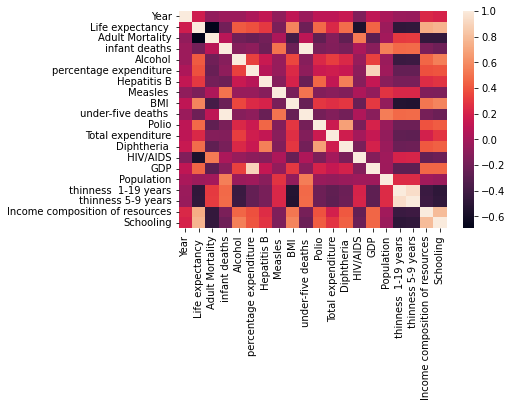

In [41]:
dataplot=sb.heatmap(dataframe_filled.corr())
plt.show()

In [43]:
print(dataframe_filled.corr())

                                     Year  Life expectancy   Adult Mortality  \
Year                             1.000000          0.167633        -0.077246   
Life expectancy                  0.167633          1.000000        -0.694567   
Adult Mortality                 -0.077246         -0.694567         1.000000   
infant deaths                   -0.037424         -0.197879         0.079334   
Alcohol                         -0.033773          0.415932        -0.207763   
percentage expenditure           0.031112          0.381974        -0.242141   
Hepatitis B                      0.114280          0.293162        -0.192363   
Measles                         -0.083279         -0.159975         0.032561   
 BMI                             0.105677          0.567732        -0.387953   
under-five deaths               -0.042892         -0.223800         0.094639   
Polio                            0.094498          0.465556        -0.274823   
Total expenditure                0.09579

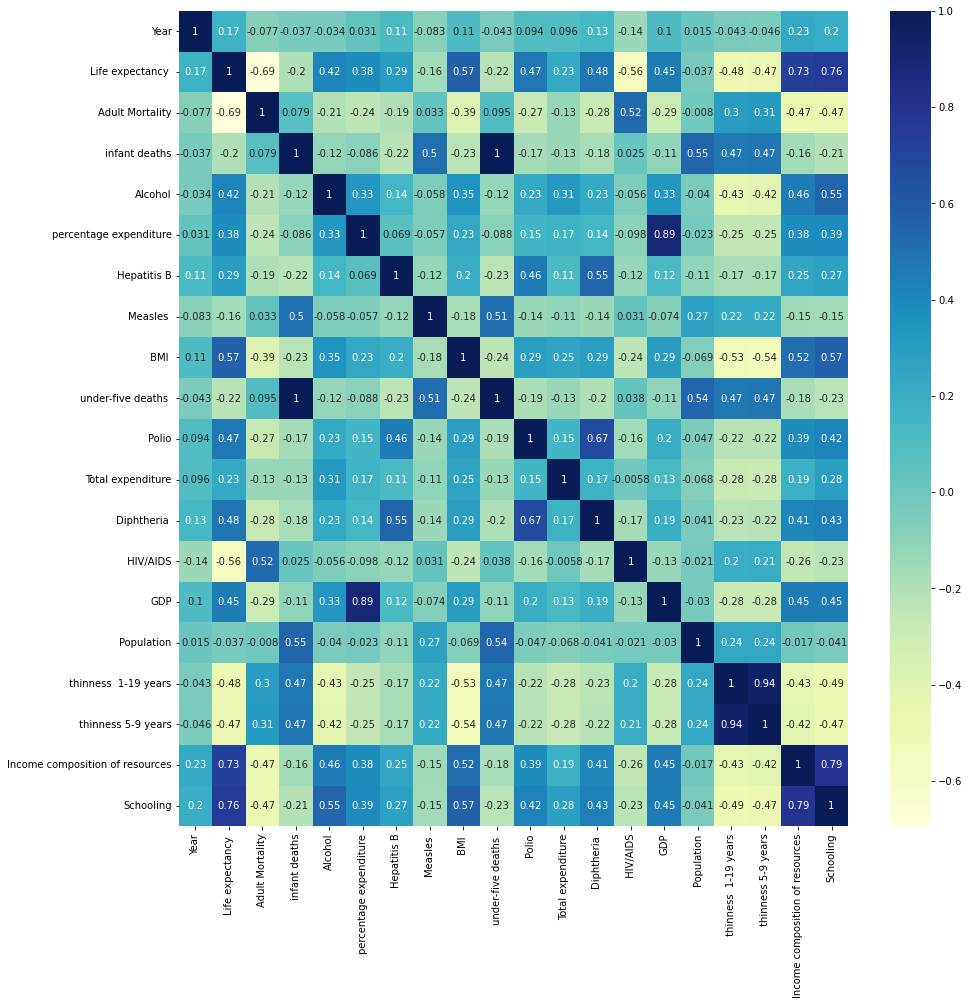

<Figure size 576x144 with 0 Axes>

In [53]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,15

dataplot = sb.heatmap(dataframe_filled.corr(), cmap="YlGnBu", annot=True)
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(2)
plt.show()

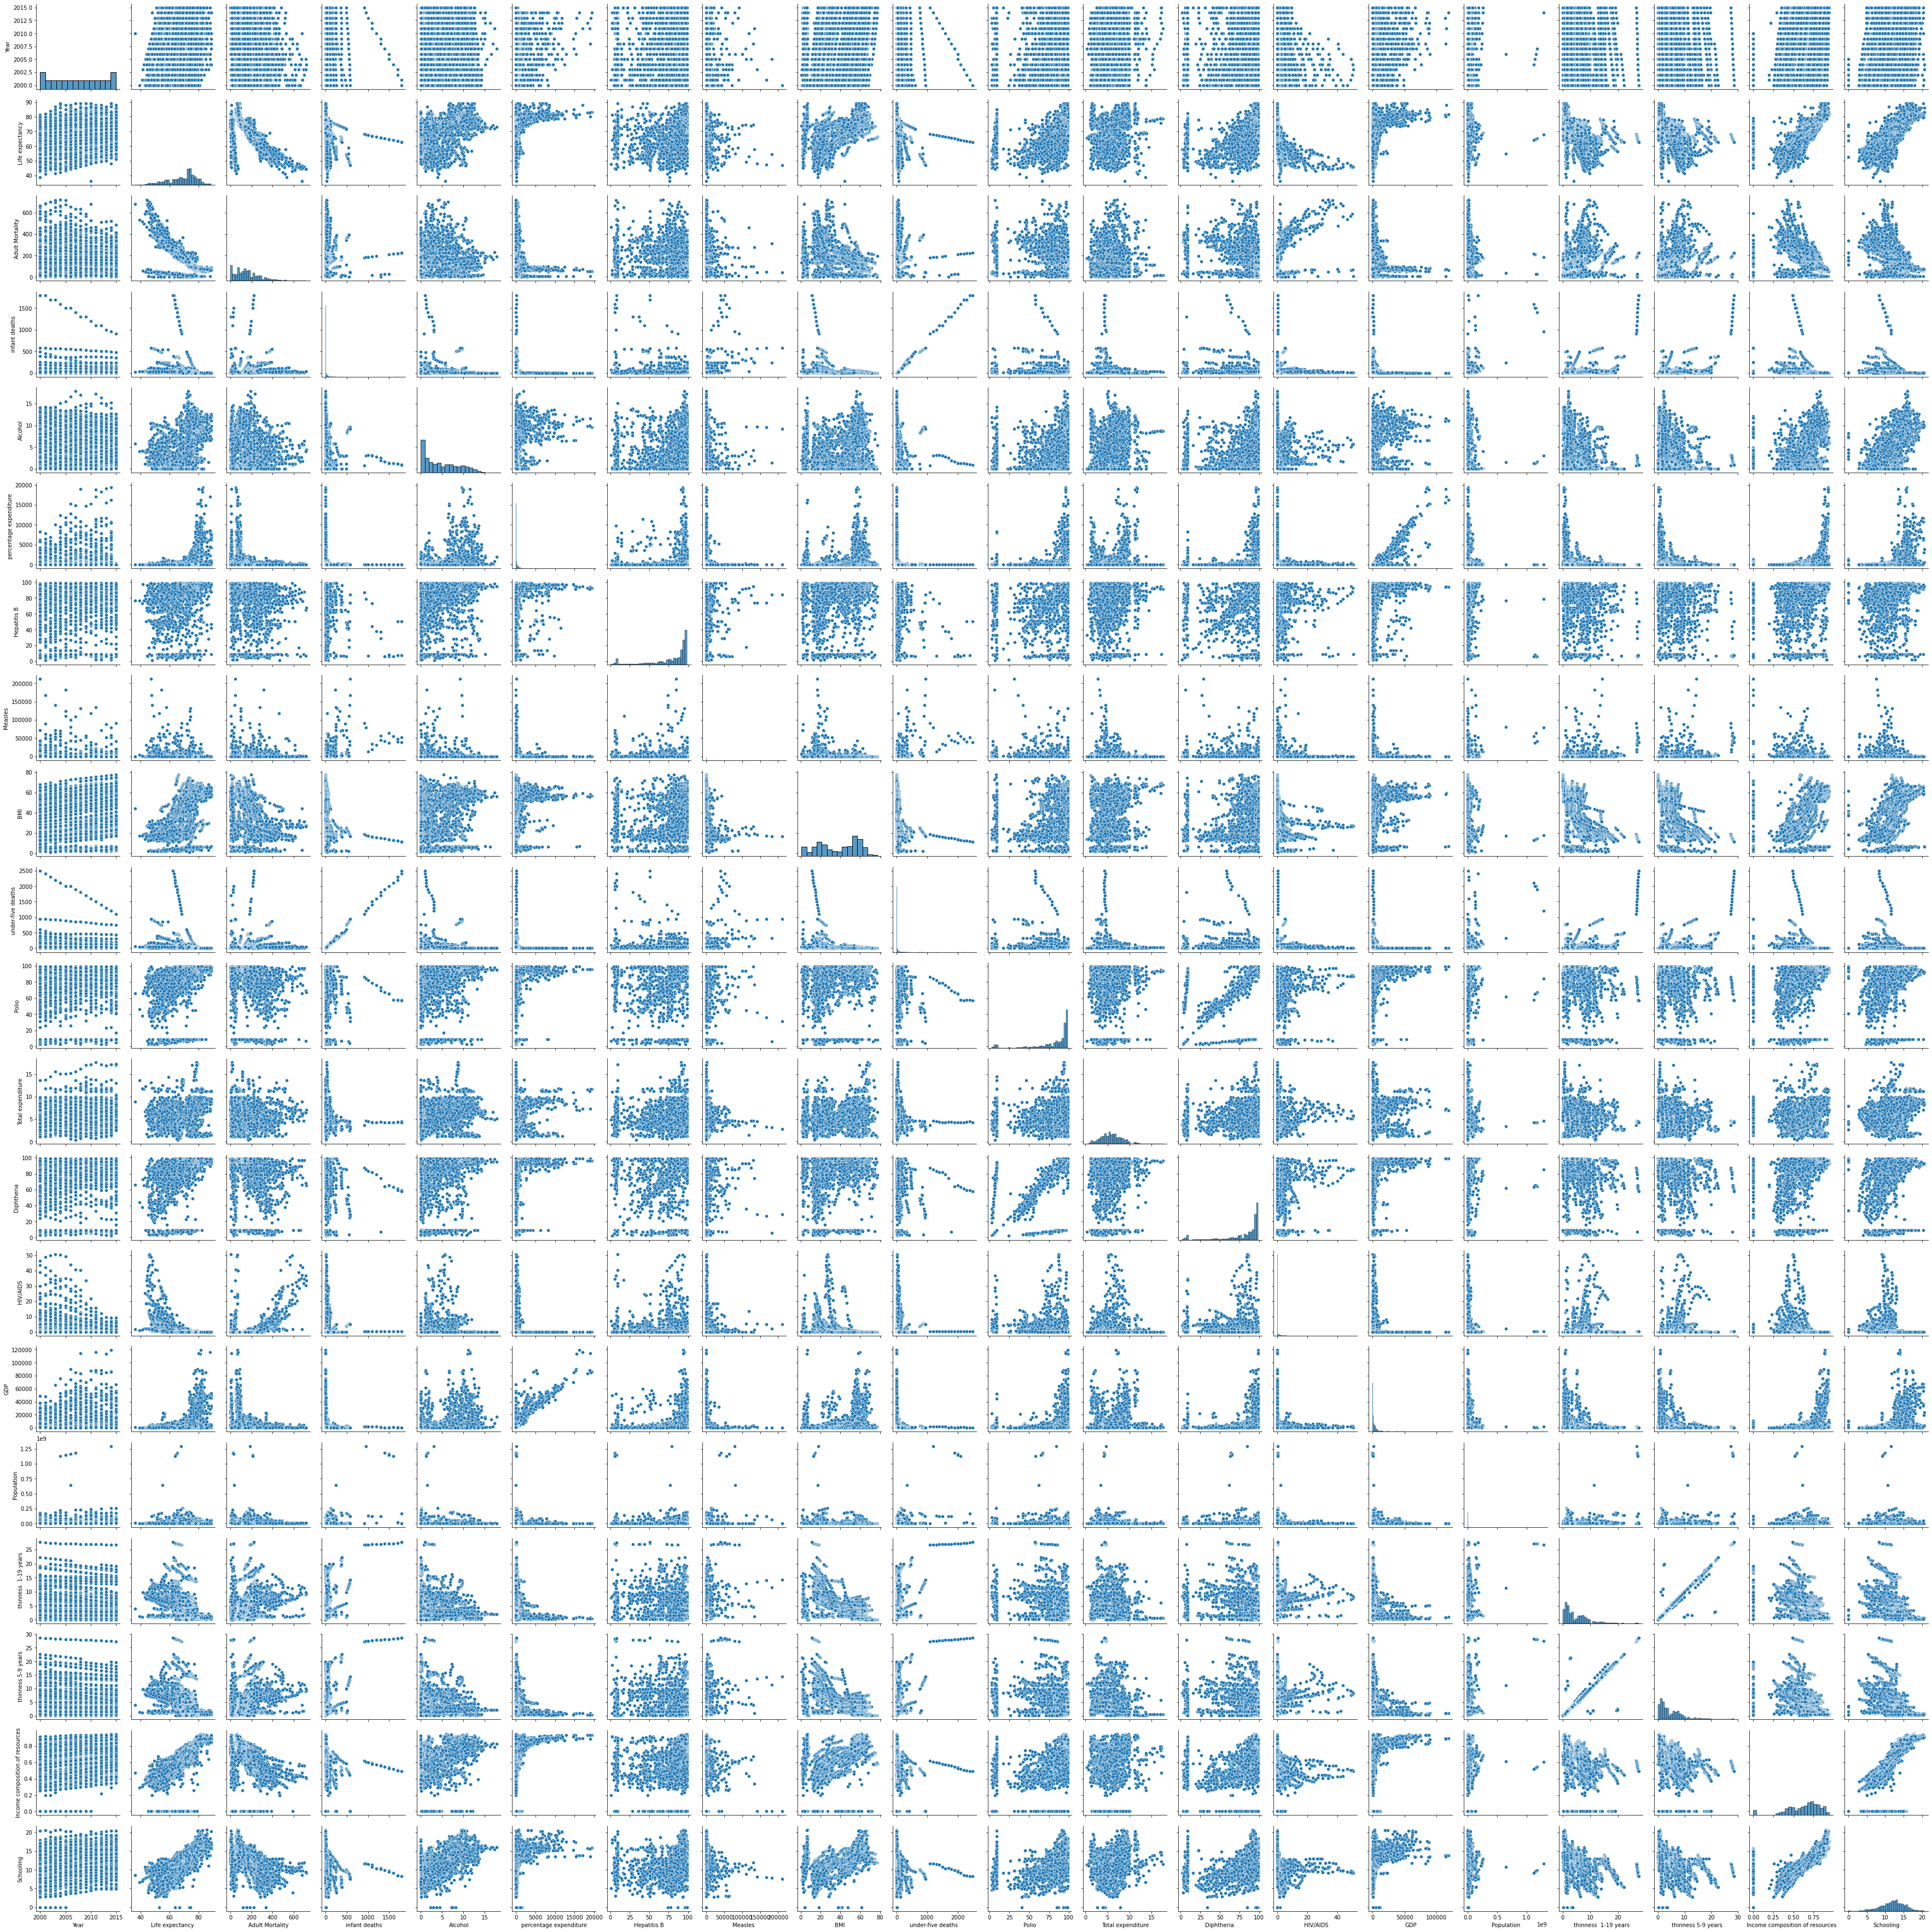

In [54]:
sb.pairplot(dataframe_filled)

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Life expectancy '}>,
        <AxesSubplot:title={'center':'Adult Mortality'}>,
        <AxesSubplot:title={'center':'infant deaths'}>],
       [<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'percentage expenditure'}>,
        <AxesSubplot:title={'center':'Hepatitis B'}>,
        <AxesSubplot:title={'center':'Measles '}>],
       [<AxesSubplot:title={'center':' BMI '}>,
        <AxesSubplot:title={'center':'under-five deaths '}>,
        <AxesSubplot:title={'center':'Polio'}>,
        <AxesSubplot:title={'center':'Total expenditure'}>],
       [<AxesSubplot:title={'center':'Diphtheria '}>,
        <AxesSubplot:title={'center':' HIV/AIDS'}>,
        <AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'Population'}>],
       [<AxesSubplot:title={'center':' thinness  1-19 years'}>,
        <AxesSubplot:title={'center':' thinness 5-9 years'}>,
        

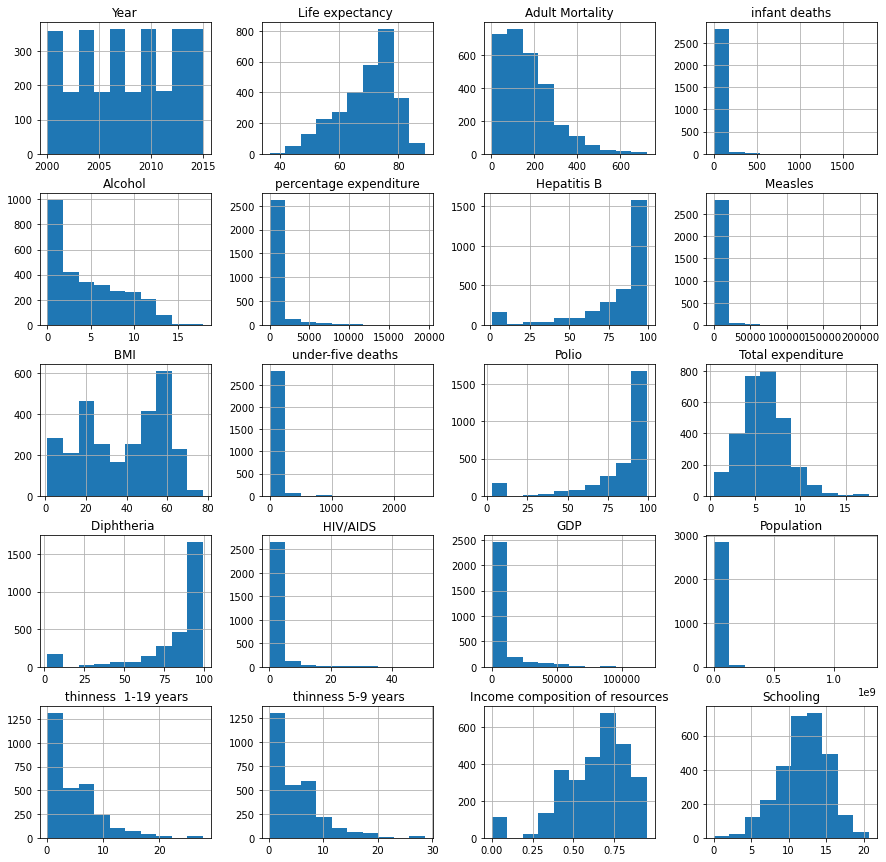

In [56]:
dataframe_filled.hist()

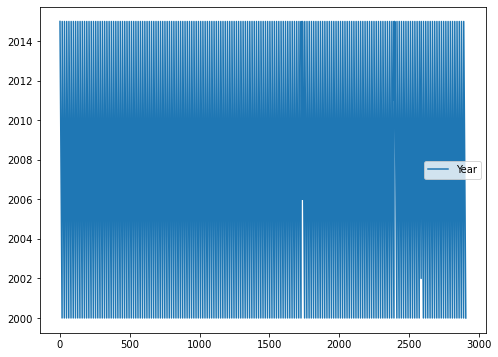

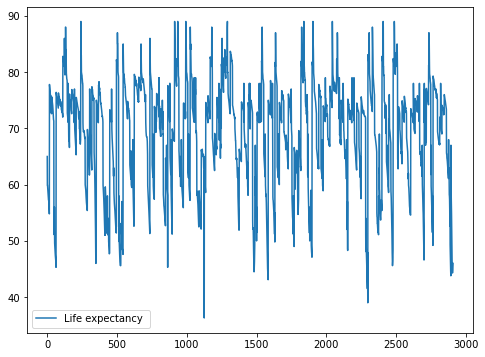

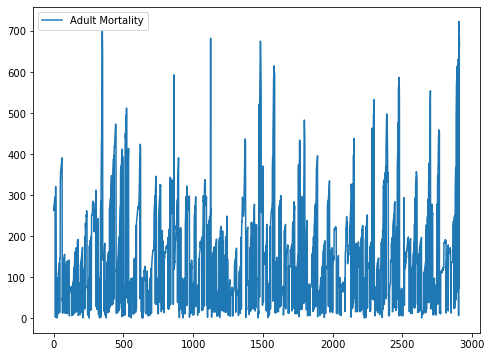

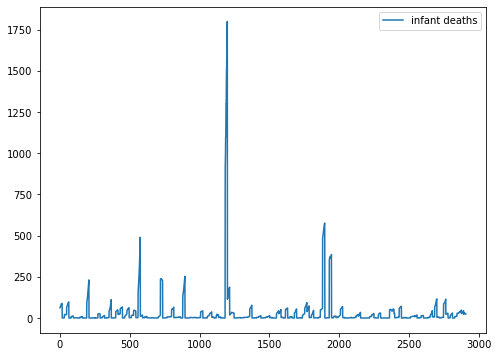

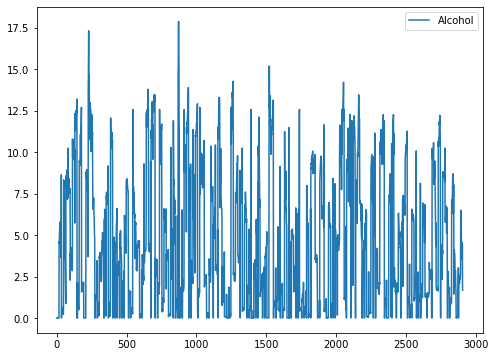

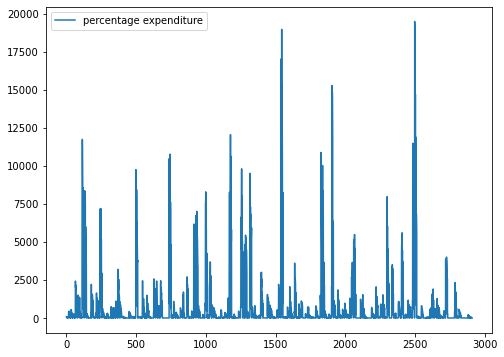

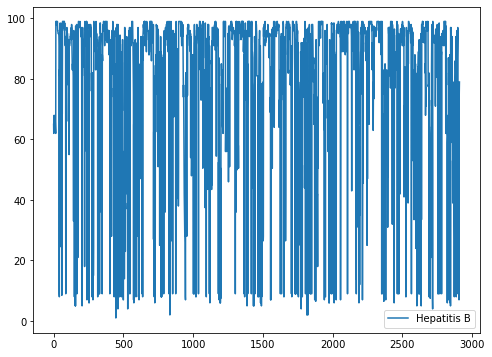

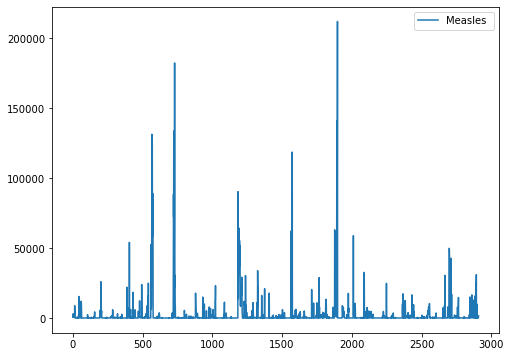

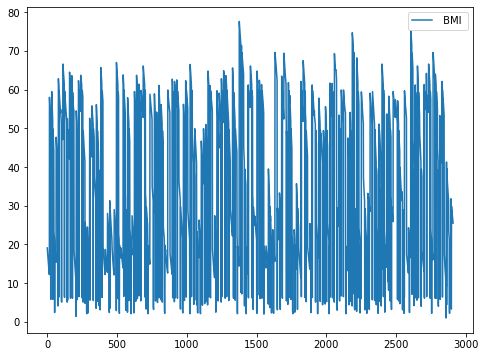

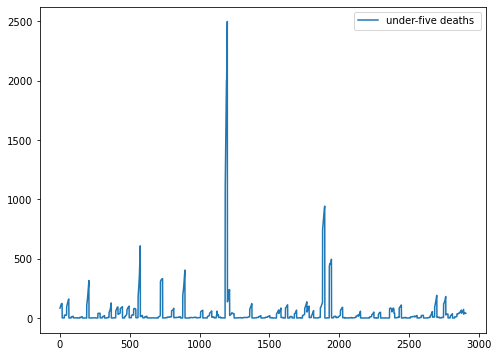

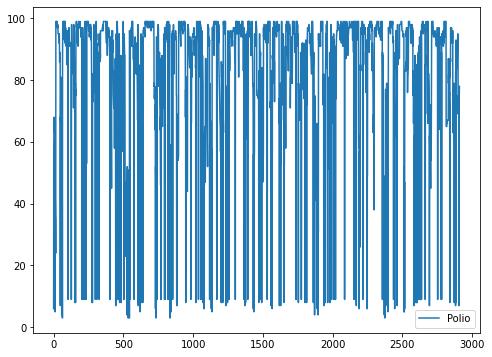

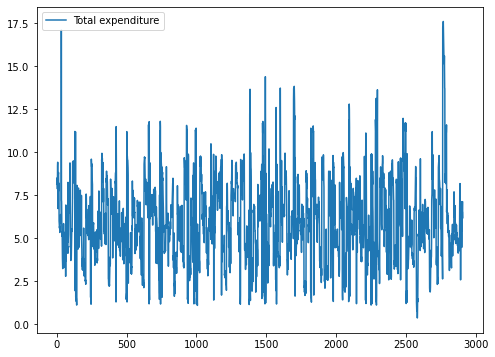

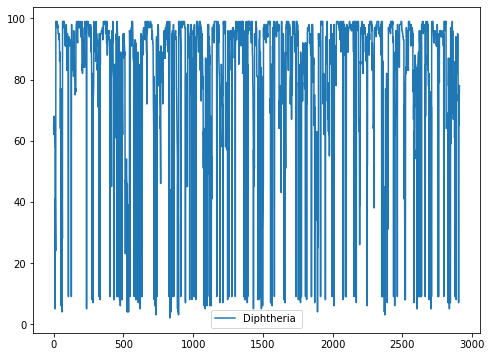

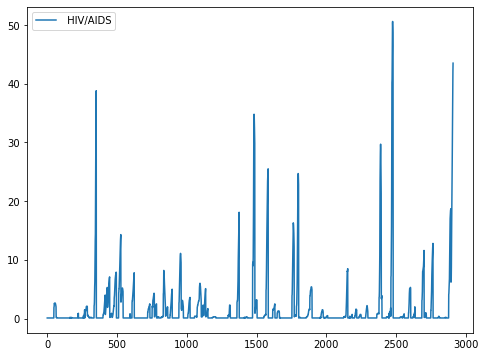

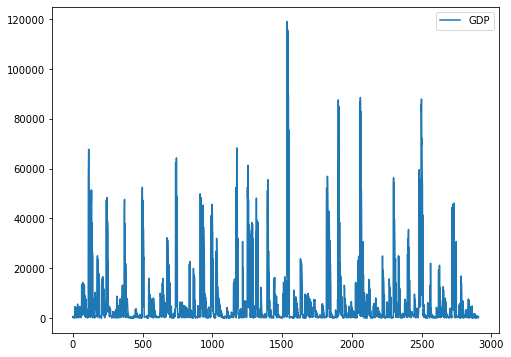

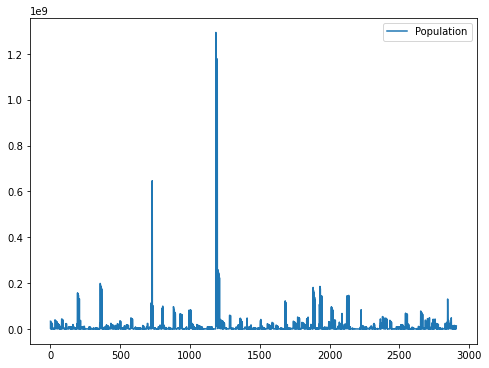

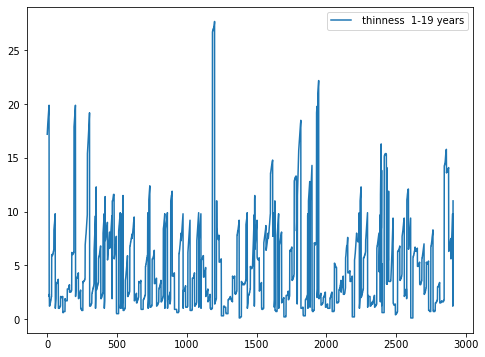

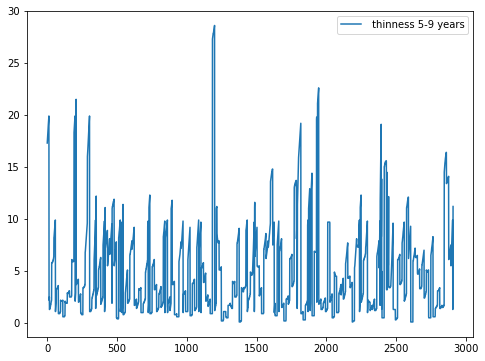

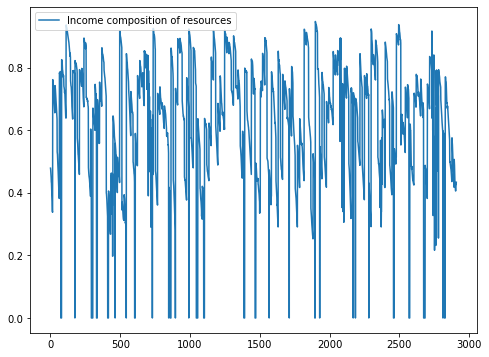

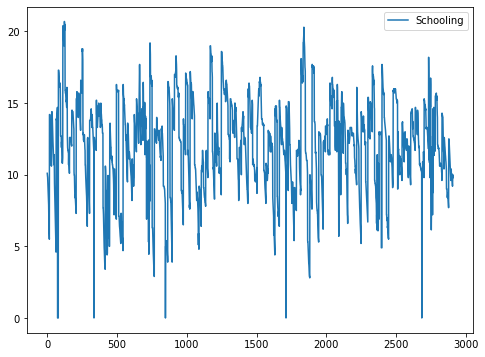

In [78]:
for d in dataframe_filled:
    if d == "Status" or d == "Country":
        continue
    dataframe_filled.plot(y = [d], figsize = (8,6))

### Encoding the data

In [81]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataframe_filled['class'] = labelencoder.fit_transform(dataframe_filled['Status'])

In [91]:
dataframe_filled.drop('Country', inplace = True, axis = 1)

In [94]:
dataframe_filled.drop('Status', inplace = True, axis = 1)

In [95]:
dataframe_filled

Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0     2015.0              65.0            263.0           62.0     0.01   
1     2014.0              59.9            271.0           64.0     0.01   
2     2013.0              59.9            268.0           66.0     0.01   
3     2012.0              59.5            272.0           69.0     0.01   
4     2011.0              59.2            275.0           71.0     0.01   
...      ...               ...              ...            ...      ...   
2904  2004.0              44.3            723.0           27.0     4.36   
2905  2003.0              44.5            715.0           26.0     4.06   
2906  2002.0              44.8             73.0           25.0     4.43   
2907  2001.0              45.3            686.0           25.0     1.72   
2908  2000.0              46.0            665.0           24.0     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         65.0    1154.0   19.1   
1                  73.523582         62.0     492.0   18.6   
2                  73.219243         64.0     430.0   18.1   
3                  78.184215         67.0    2787.0   17.6   
4                   7.097109         68.0    3013.0   17.2   
...                      ...          ...       ...    ...   
2904                0.000000         68.0      31.0   27.1   
2905                0.000000          7.0     998.0   26.7   
2906                0.000000         73.0     304.0   26.3   
2907                0.000000         76.0     529.0   25.9   
2908                0.000000         79.0    1483.0   25.5   

      under-five deaths   ...  Total expenditure  Diphtheria    HIV/AIDS  \
0                   83.0  ...               8.16         65.0        0.1   
1                   86.0  ...               8.18         62.0        0.1   
2                   89.0  ...               8.13         64.0        0.1   
3                   93.0  ...               8.52         67.0        0.1   
4                   97.0  ...               7.87         68.0        0.1   
...                  ...  ...                ...          ...        ...   
2904                42.0  ...               7.13         65.0       33.6   
2905                41.0  ...               6.52         68.0       36.7   
2906                40.0  ...               6.53         71.0       39.8   
2907                39.0  ...               6.16         75.0       42.1   
2908                39.0  ...               7.10         78.0       43.5   

             GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0     584.259210  33736494.0                   17.2                 17.3   
1     612.696514    327582.0                   17.5                 17.5   
2     631.744976  31731688.0                   17.7                 17.7   
3     669.959000   3696958.0                   17.9                 18.0   
4      63.537231   2978599.0                   18.2                 18.2   
...          ...         ...                    ...                  ...   
2904  454.366654  12777511.0                    9.4                  9.4   
2905  453.351155  12633897.0                    9.8                  9.9   
2906   57.348340    125525.0                    1.2                  1.3   
2907  548.587312  12366165.0                    1.6                  1.7   
2908  547.358878  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  class  
0                               0.479       10.1      1  
1                               0.476       10.0      1  
2                               0.470        9.9      1  
3                               0.463        9.8      1  
4                               0.454        9.5      1  
...                               ...        ...    ...  
2904                            0.407        9.2      1  
2905                            0.418        9.5      1  
2906          

### Outliers and Skewness

In [96]:
from scipy import stats

z = np.abs(stats.zscore(dataframe_filled))
print(z)

          Year  Life expectancy   Adult Mortality  infant deaths   Alcohol  \
0     1.622208          0.451477         0.797756       0.265923  1.150923   
1     1.405202          0.988745         0.862281       0.282805  1.150923   
2     1.188197          0.988745         0.838084       0.299687  1.150923   
3     0.971191          1.030884         0.870347       0.325010  1.150923   
4     0.754186          1.062488         0.894544       0.341892  1.150923   
...        ...               ...              ...            ...       ...   
2904  0.764853          2.632154         4.507943       0.029513  0.073562   
2905  0.981859          2.611085         4.443418       0.037954  0.147863   
2906  1.198864          2.579481         0.734712       0.046395  0.056225   
2907  1.415870          2.526807         4.209515       0.046395  0.727409   
2908  1.632875          2.453065         4.040137       0.054836  0.737315   

      percentage expenditure  Hepatitis B  Measles       BMI   

In [105]:
#Removing skewness using z score
dataframe = dataframe_filled[(np.abs(stats.zscore(dataframe_filled)) < 4.25).all(axis = 1)]
print(dataframe.shape)

(2746, 21)


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Life expectancy '}>,
        <AxesSubplot:title={'center':'Adult Mortality'}>,
        <AxesSubplot:title={'center':'infant deaths'}>,
        <AxesSubplot:title={'center':'Alcohol'}>],
       [<AxesSubplot:title={'center':'percentage expenditure'}>,
        <AxesSubplot:title={'center':'Hepatitis B'}>,
        <AxesSubplot:title={'center':'Measles '}>,
        <AxesSubplot:title={'center':' BMI '}>,
        <AxesSubplot:title={'center':'under-five deaths '}>],
       [<AxesSubplot:title={'center':'Polio'}>,
        <AxesSubplot:title={'center':'Total expenditure'}>,
        <AxesSubplot:title={'center':'Diphtheria '}>,
        <AxesSubplot:title={'center':' HIV/AIDS'}>,
        <AxesSubplot:title={'center':'GDP'}>],
       [<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':' thinness  1-19 years'}>,
        <AxesSubplot:title={'center':' thinness 5-9 years'}>,
        <

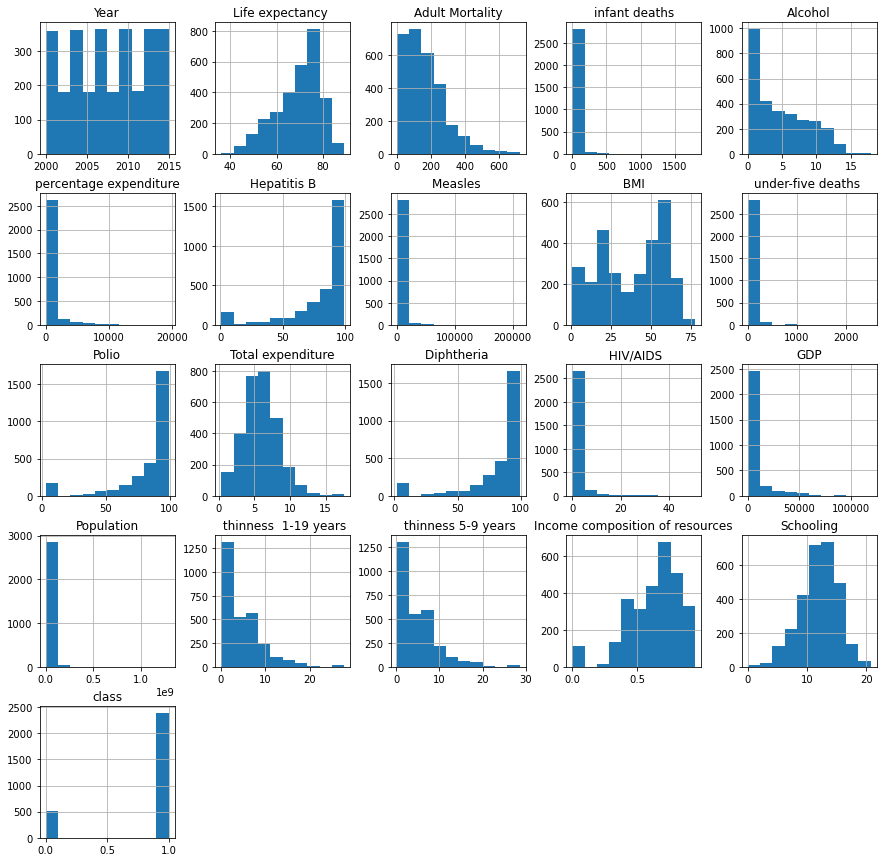

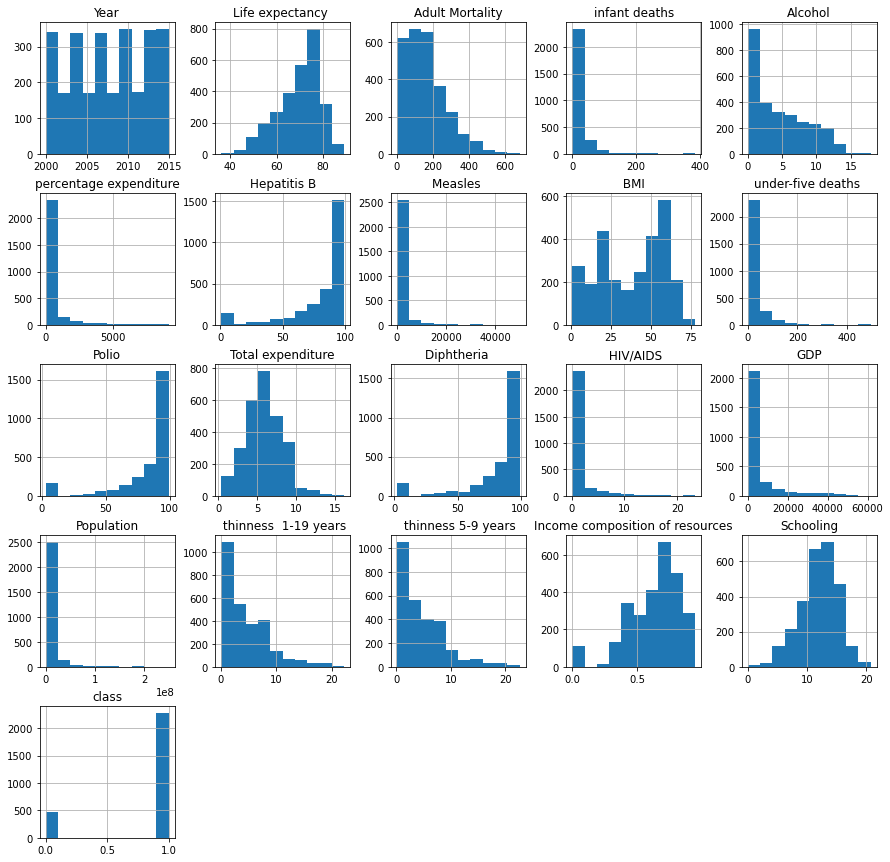

In [106]:
#Histograms before removing skewness
dataframe_filled.hist()
#Histograms after removing skewness
dataframe.hist()

In [107]:
dataframe.skew()

Year                              -0.014859
Life expectancy                   -0.635864
Adult Mortality                    0.927285
infant deaths                      4.912614
Alcohol                            0.613702
percentage expenditure             3.629210
Hepatitis B                       -1.916520
Measles                            5.866606
 BMI                              -0.255483
under-five deaths                  4.420326
Polio                             -2.130845
Total expenditure                  0.429758
Diphtheria                        -2.112671
 HIV/AIDS                          3.950221
GDP                                2.733405
Population                         5.465482
 thinness  1-19 years              1.405924
 thinness 5-9 years                1.456501
Income composition of resources   -1.134456
Schooling                         -0.449580
class                             -1.771190
dtype: float64

Skewness analysis is not very important in this case

In [148]:
# Ys = Ys.to_frame().reset_index()
# Ys.drop('index', axis=1, inplace=True)
print(type(Ys))
print(Ys)
print(type(Xs))

<class 'pandas.core.frame.DataFrame'>
      Life expectancy 
0                 65.0
1                 59.9
2                 59.9
3                 59.5
4                 59.2
...                ...
2741              56.6
2742              54.9
2743              52.4
2744              50.0
2745              48.2

[2746 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [124]:
dataframe

Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0     2015.0            263.0           62.0     0.01               71.279624   
1     2014.0            271.0           64.0     0.01               73.523582   
2     2013.0            268.0           66.0     0.01               73.219243   
3     2012.0            272.0           69.0     0.01               78.184215   
4     2011.0            275.0           71.0     0.01                7.097109   
...      ...              ...            ...      ...                     ...   
2896  2012.0            429.0           26.0     6.09               92.602336   
2897  2011.0            464.0           28.0     6.00               63.750530   
2898  2010.0            527.0           29.0     5.21               53.308581   
2899  2009.0            587.0           30.0     4.64                1.040021   
2900  2008.0            632.0           30.0     3.56               20.843429   

      Hepatitis B  Measles    BMI   under-five deaths   Polio  ...  \
0            65.0    1154.0   19.1                83.0    6.0  ...   
1            62.0     492.0   18.6                86.0   58.0  ...   
2            64.0     430.0   18.1                89.0   62.0  ...   
3            67.0    2787.0   17.6                93.0   67.0  ...   
4            68.0    3013.0   17.2                97.0   68.0  ...   
...           ...       ...    ...                 ...    ...  ...   
2896         97.0       0.0    3.3                39.0   95.0  ...   
2897         94.0       0.0   29.9                42.0   93.0  ...   
2898          9.0    9696.0   29.4                44.0   89.0  ...   
2899         73.0     853.0   29.0                45.0   69.0  ...   
2900         75.0       0.0   28.6                46.0   75.0  ...   

      Diphtheria    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0            65.0        0.1  584.259210  33736494.0                   17.2   
1            62.0        0.1  612.696514    327582.0                   17.5   
2            64.0        0.1  631.744976  31731688.0                   17.7   
3            67.0        0.1  669.959000   3696958.0                   17.9   
4            68.0        0.1   63.537231   2978599.0                   18.2   
...           ...        ...         ...         ...                    ...   
2896         95.0        8.8  955.648466   1471826.0                    6.5   
2897         93.0       13.3  839.927936  14386649.0                    6.8   
2898         89.0       15.7  713.635620   1486317.0                    7.1   
2899         73.0       18.1   65.824121   1381599.0                    7.5   
2900         75.0       20.5  325.678573  13558469.0                    7.8   

       thinness 5-9 years  Income composition of resources  Schooling  class  \
0                    17.3                            0.479       10.1      1   
1                    17.5                            0.476       10.0      1   
2                    17.7                            0.470        9.9      1   
3                    18.0                            0.463        9.8      1   
4                    18.2                            0.454        9.5      1   
...                   ...                              ...        ...    ...   
2896                  6.4                            0.464        9.8      1   
2897                  6.7                            0.452       10.1      1   
2898                  7.0                            0.436       10.0      1   
2899                  7.4                            0.419        9.9      1   
2900                  7.8                            0.421        9.7      1   

      Life expectancy   
0                 65.0  
1                 59.9  
2                 59.9  
3                 59.5  
4                 59.2  
...                ...  
2896              56.6  
2897              54.9  
2898              52.4  
2899              50.0  
2900     

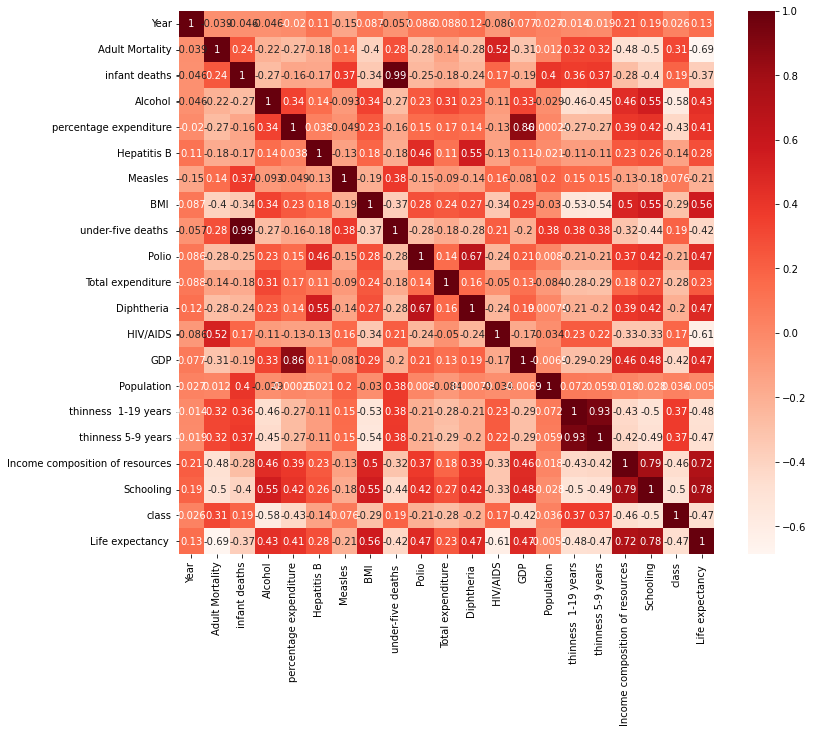

Adult Mortality                    0.687451
 BMI                               0.563148
 HIV/AIDS                          0.608486
Income composition of resources    0.723910
Schooling                          0.775626
Life expectancy                    1.000000
Name: Life expectancy , dtype: float64


In [158]:
plt.figure(figsize = (12,10))
cor = dataframe.corr()
sb.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

cor_target = abs(cor["Life expectancy "])
relevant_features = cor_target[cor_target > 0.5]
print(relevant_features)

### Identifying the most important parameters
This means that Schooling, Income Composition of Resources and BMI are the factors one must improve upon to get better Life Expectancy

In [169]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, f_classif

test = SelectKBest(score_func = f_classif, k = 15)
fit = test.fit(Xs, Ys)
set_printoptions(precision = 15)


features = fit.transform(Xs)
ANOVA_featuresForTraining = test.fit_transform(Xs, Ys)
ANOVA_support = test.get_support()
ANOVA_feature = Xs.loc[:,ANOVA_support].columns.tolist()
print(len(ANOVA_feature))
print(ANOVA_feature)

15
['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling', 'class']


C:\Softwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Softwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [170]:
dataframe.columns

Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'class', 'Life expectancy '],
      dtype='object')

In [179]:
#Removing redundant features

# dataframe.drop('Year', axis=1, inplace=True)
# dataframe.drop('infant deaths', axis=1, inplace=True)
# dataframe.drop('Hepatitis B', axis=1, inplace=True)
# dataframe.drop('Total expenditure', axis=1, inplace=True)
# dataframe.drop('Population', axis=1, inplace=True)

print(dataframe.shape)

(2746, 16)


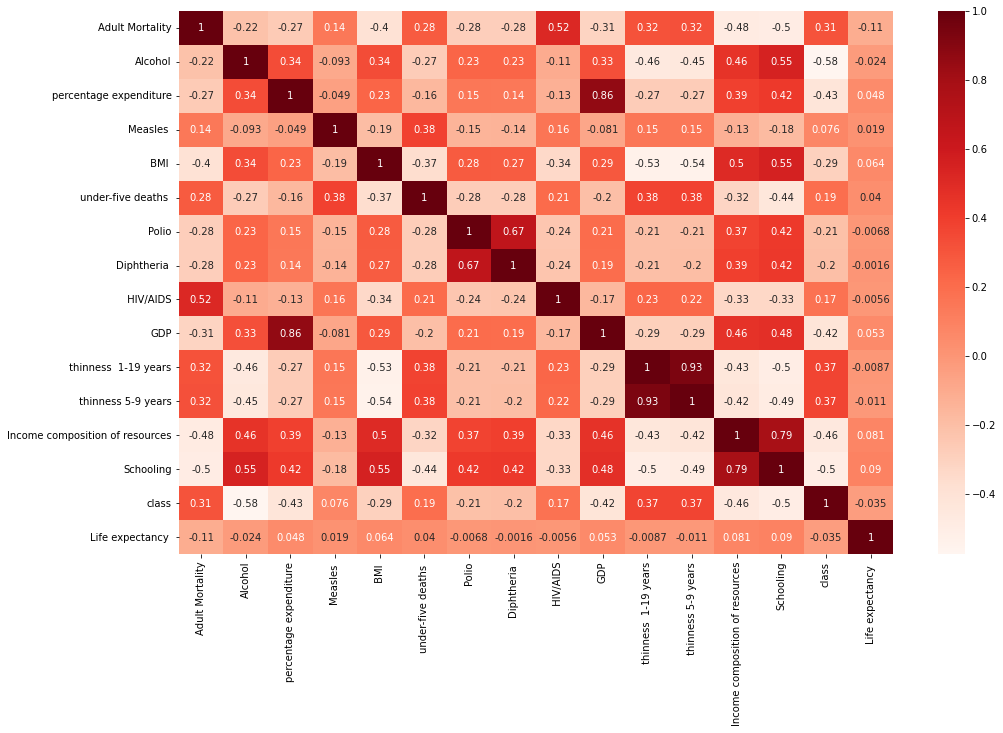

In [180]:
#Re looking at the heatmap to study for any remaining redundant features

plt.figure(figsize = (16,10))
cor = dataframe.corr()
sb.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [181]:
#Removing another redundant feature using the data in the heatmap

dataframe.drop('percentage expenditure', axis=1, inplace=True)
print(dataframe.shape)

(2746, 15)


In [188]:
dataframe

Adult Mortality  Alcohol  Measles    BMI   under-five deaths   Polio  \
0               263.0     0.01    1154.0   19.1                83.0    6.0   
1               271.0     0.01     492.0   18.6                86.0   58.0   
2               268.0     0.01     430.0   18.1                89.0   62.0   
3               272.0     0.01    2787.0   17.6                93.0   67.0   
4               275.0     0.01    3013.0   17.2                97.0   68.0   
...               ...      ...       ...    ...                 ...    ...   
2741              8.0    11.84    1022.0   61.9                 4.0   92.0   
2742             82.0    11.61     764.0   61.3                 4.0   92.0   
2743             82.0    12.05      79.0    6.7                 4.0   91.0   
2744             83.0    12.22     189.0    6.1                 4.0   92.0   
2745             86.0    11.85     460.0   59.5                 4.0   91.0   

      Diphtheria    HIV/AIDS           GDP   thinness  1-19 years  \
0            65.0        0.1    584.259210                   17.2   
1            62.0        0.1    612.696514                   17.5   
2            64.0        0.1    631.744976                   17.7   
3            67.0        0.1    669.959000                   17.9   
4            68.0        0.1     63.537231                   18.2   
...           ...        ...           ...                    ...   
2741         92.0        0.1    754.377815                    0.7   
2742         92.0        0.1    101.250279                    0.7   
2743         91.0        0.1  17254.633330                    0.7   
2744         92.0        0.1   5864.260069                    0.7   
2745         91.0        0.1   2011.643060                    0.7   

       thinness 5-9 years  Income composition of resources  Schooling  class  \
0                    17.3                           0.4790      10.10      1   
1                    17.5                           0.4760      10.00      1   
2                    17.7                           0.4700       9.90      1   
3                    18.0                           0.4630       9.80      1   
4                    18.2                           0.4540       9.50      1   
...                   ...                              ...        ...    ...   
2741                  0.5                           0.5760      10.15      0   
2742                  0.5                           0.3275       9.80      0   
2743                  0.5                           0.7205      12.25      0   
2744                  0.5                           0.7960      15.15      0   
2745                  0.5                           0.8200      14.80      0   

      Life expectancy   
0                 65.0  
1                 59.9  
2                 59.9  
3                 59.5  
4                 59.2  
...                ...  
2741              56.6  
2742              54.9  
2743              52.4  
2744              50.0  
2745              48.2  

[2598 rows x 15 columns]

## Modelling

### Splitting into test and train dataset

In [191]:
x_train,x_test,y_train,y_test = train_test_split(dataframe.drop(["Life expectancy "],axis=1),dataframe["Life expectancy "],test_size = 0.25)

In [195]:
x_train

Adult Mortality  Alcohol  Measles    BMI   under-five deaths   Polio  \
136               8.0    12.50      20.0   53.7                 0.0   85.0   
1829             77.0     9.56      11.0   55.0                 1.0   98.0   
2075             66.0     0.01     442.0   31.2                 2.0   99.0   
673              53.0     0.01      10.0   59.8                 0.0   99.0   
1674            168.0     3.94       7.0   28.0                 0.0   97.0   
...               ...      ...       ...    ...                 ...    ...   
1412            188.0     3.28     222.0   41.4                 4.0   94.0   
511              82.0     7.60     206.0   57.8                 2.0   88.0   
963             269.0     0.01       0.0   25.4                 5.0   98.0   
1039             84.0     8.48      56.0   57.4                 1.0   89.0   
1399             88.0     0.03       0.0   67.5                 1.0   99.0   

      Diphtheria    HIV/AIDS           GDP   thinness  1-19 years  \
136          85.0        0.1  46586.652500                    1.7   
1829         98.0        0.1  39954.642220                    1.0   
2075         99.0        0.1   1997.921723                    1.5   
673          99.0        0.1   2734.883820                    0.9   
1674         97.0        0.1   5116.454240                    7.7   
...           ...        ...           ...                    ...   
1412         96.0        0.2     93.583267                    3.2   
511          89.0        0.1  24124.169170                    0.5   
963          98.0        1.4   3305.138392                    7.8   
1039         89.0        0.1   1242.953730                    0.9   
1399         99.0        0.1  55571.998600                    3.3   

       thinness 5-9 years  Income composition of resources  Schooling  class  
136                   1.9                           0.8600       15.2      0  
1829                  1.0                           0.8850       16.5      0  
2075                  1.0                           0.5645       11.6      1  
673                   1.0                           0.8500       14.0      0  
1674                  7.6                           0.7040       13.0      1  
...                   ...                              ...        ...    ...  
1412                  3.3                           0.6320       12.1      1  
511                   0.5                           0.8640       15.9      1  
963                   7.7                           0.4400        8.8      1  
1039                  0.8                           0.7940       13.9      1  
1399                  3.1                           0.7870       13.8      1  

[1948 rows x 14 columns]

In [196]:
x_test

Adult Mortality  Alcohol  Measles    BMI   under-five deaths   Polio  \
2705             24.0     8.48    1333.0   59.0                 5.0   54.0   
2252            122.0     9.16       1.0   58.9                 1.0   97.0   
2245            247.0     0.35      31.0   19.1                42.0   87.0   
1926            127.0     0.56       1.0   48.1                 1.0   99.0   
139              86.0    12.10      15.0   52.2                 0.0   83.0   
...               ...      ...       ...    ...                 ...    ...   
1839             71.0     9.62      43.0   64.8                 0.0   93.0   
2704             25.0     8.44   12746.0   59.6                 5.0   72.0   
361             161.0     7.10      57.0   48.6                79.0   99.0   
1460             93.0     1.57       9.0   64.0                 1.0   75.0   
2047             88.0    12.25       5.0   58.1                 0.0   97.0   

      Diphtheria    HIV/AIDS           GDP   thinness  1-19 years  \
2705          5.0        0.2   3569.757270                    2.4   
2252         95.0        0.1   6353.826383                    2.1   
2245         87.0        0.7    733.581811                   11.6   
1926         99.0        0.1    969.812600                    7.1   
139          83.0        0.1  36693.426200                    1.7   
...           ...        ...           ...                    ...   
1839         93.0        0.1  33691.348370                    0.3   
2704         76.0        0.2   3855.421280                    2.4   
361          99.0        0.1    586.145975                    3.1   
1460         81.0        0.1   8734.965300                    4.7   
2047         98.0        0.1  22538.654800                    0.7   

       thinness 5-9 years  Income composition of resources  Schooling  class  
2705                  2.5                            0.734       14.9      1  
2252                  2.1                            0.766       14.1      1  
2245                 11.5                            0.408        6.2      1  
1926                  6.8                            0.725       11.2      1  
139                   1.9                            0.841       14.7      0  
...                   ...                              ...        ...    ...  
1839                  0.3                            0.899       20.3      0  
2704                  2.4                            0.739       15.1      1  
361                   3.1                            0.698       13.8      1  
1460                  4.7                            0.758       13.2      1  
2047                  0.5                            0.812       16.0      0  

[650 rows x 14 columns]

In [197]:
y_train

136     78.7
1829    62.9
2075    76.0
673     76.5
1674    56.7
        ... 
1412    72.7
511     45.7
963     79.9
1039    58.4
1399    74.9
Name: Life expectancy , Length: 1948, dtype: float64

In [198]:
y_test

2705    73.4
2252    51.9
2245    55.0
1926    74.7
139     72.7
        ... 
1839    77.3
2704    73.6
361     78.3
1460    72.0
2047    73.1
Name: Life expectancy , Length: 650, dtype: float64

In [200]:
#Scaling the data for better results
from sklearn import preprocessing

x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)

### Trying various models

In [211]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import svm, tree
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [228]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

LR_model = lr.fit(x_train,y_train)

y_train_prediction = LR_model.predict(x_train)
y_test_prediction = LR_model.predict(x_test)

print("The training R^2 score ",r2_score(y_train, y_train_prediction))
print("The training RMSE score ",math.sqrt(mean_squared_error(y_train_prediction,y_train)))
print("The test R^2 score ",r2_score(y_test, y_test_prediction))
print("The test RMSE score ",math.sqrt(mean_squared_error(y_test_prediction,y_test)))

The training R^2 score  0.036318682661806156
The training RMSE score  8.82551375765307
The test R^2 score  0.02469016629768339
The test RMSE score  9.364632424790125


In [221]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9],
            'weights':['uniform', 'distance'],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'p':[1,2],}
grid = HalvingGridSearchCV(knn, param_grid, refit = True, verbose = -1, n_jobs=-1, return_train_score = True)

knn_best = grid.fit(x_train, y_train) 

print(grid.best_params_) 

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 24
max_resources_: 1948
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 144
n_resources: 24
----------
iter: 1
n_candidates: 48
n_resources: 72
----------
iter: 2
n_candidates: 16
n_resources: 216
----------
iter: 3
n_candidates: 6
n_resources: 648
----------
iter: 4
n_candidates: 2
n_resources: 1944
{'algorithm': 'brute', 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}


In [232]:
y_train_pred_knn = knn_best.predict(x_train)
y_test_pred_knn = knn_best.predict(x_test)
print("On training data:")
print("R2score:\t",r2_score(y_train,y_train_pred_knn))
print("RMSE Error:\t",math.sqrt(mean_squared_error(y_train_pred_knn,y_train)))
print("On test data:")
print("R2score:\t",r2_score(y_test,y_test_pred_knn))
print("RMSE Error:\t",math.sqrt(mean_squared_error(y_test_pred_knn,y_test)))

On training data:
R2score:	 1.0
RMSE Error:	 0.0
On test data:
R2score:	 0.4747794393978233
RMSE Error:	 6.872113018655714


In [235]:
from sklearn.preprocessing import PolynomialFeatures

polynomial1_regressor = PolynomialFeatures(degree = 1)

X__train = polynomial1_regressor.fit_transform(x_train)
X__test = polynomial1_regressor.fit_transform(x_test)

poly_reg = LinearRegression().fit(X__train,y_train)

y_train_pred_pr1 = poly_reg.predict(X__train)
y_test_pred_pr1 = poly_reg.predict(X__test)

train_score = math.sqrt(mean_squared_error(y_train_pred_pr1,y_train))
test_score = math.sqrt(mean_squared_error(y_test_pred_pr1,y_test))

print("The training R^2 score (deg = 1):\t" , r2_score(y_train, y_train_pred_pr1))
print("The test R^2 score (deg = 1):\t" , r2_score(y_test, y_test_pred_pr1))
print("The training RMSE score (deg = 1):\t" , math.sqrt(mean_squared_error(y_train_pred_pr1,y_train)))
print("The test RMSE score (deg = 1):\t" , math.sqrt(mean_squared_error(y_test_pred_pr1,y_test)))


polynomial2_regressor = PolynomialFeatures(degree = 2)

X__train = polynomial2_regressor.fit_transform(x_train)
X__test = polynomial2_regressor.fit_transform(x_test)

poly_reg = LinearRegression().fit(X__train,y_train)

y_train_pred_pr2 = poly_reg.predict(X__train)
y_test_pred_pr2 = poly_reg.predict(X__test)

train_score = math.sqrt(mean_squared_error(y_train_pred_pr2,y_train))
test_score = math.sqrt(mean_squared_error(y_test_pred_pr2,y_test))

print("The training R^2 score (deg = 2):\t" , r2_score(y_train, y_train_pred_pr2))
print("The test R^2 score (deg = 2):\t" , r2_score(y_test, y_test_pred_pr2))
print("The training RMSE score (deg = 2):\t" , math.sqrt(mean_squared_error(y_train_pred_pr2,y_train)))
print("The test RMSE score (deg = 2):\t" , math.sqrt(mean_squared_error(y_test_pred_pr2,y_test)))

The training R^2 score (deg = 1):	 0.03631868266180638
The test R^2 score (deg = 1):	 0.02469016629768339
The training RMSE score (deg = 1):	 8.825513757653068
The test RMSE score (deg = 1):	 9.364632424790125
The training R^2 score (deg = 2):	 0.18713957345115118
The test R^2 score (deg = 2):	 -7.186391179491995e+21
The training RMSE score (deg = 2):	 8.105527189322617
The test RMSE score (deg = 2):	 803849712257.8604


In [238]:
from sklearn.ensemble import BaggingRegressor

bag_Reg = BaggingRegressor()

param_grid = {'max_samples' : [0.05, 0.1, 0.2, 0.5]}
grid = HalvingGridSearchCV(bag_Reg, param_grid, refit = True, verbose = -1,n_jobs=-1)
bag_Reg_Ideal = grid.fit(x_train, y_train) 

y_train_pred_br = bag_Reg_Ideal.predict(x_train)
y_test_pred_br = bag_Reg_Ideal.predict(x_test)

print("On training data:")
print("R2score:\t",r2_score(y_train,y_train_pred_br))
print("RMSE Error:\t",math.sqrt(mean_squared_error(y_train_pred_br,y_train)))
print("On test data:")
print("R2score:\t",r2_score(y_test,y_test_pred_br))
print("RMSE Error:\t",math.sqrt(mean_squared_error(y_test_pred_br,y_test)))

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 649
max_resources_: 1948
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 649
----------
iter: 1
n_candidates: 2
n_resources: 1947
On training data:
R2score:	 0.7498877803836654
RMSE Error:	 4.496149379218445
On test data:
R2score:	 0.33760844805789914
RMSE Error:	 7.717503342801599


In [240]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

paramOf_grid = {'learning_rate': [0.008,0.01,0.03],'subsample'    : [0.8, 0.5, 0.3],'n_estimators' : [500,1000],'max_depth'    : [6,8,12,14]}
grid = HalvingGridSearchCV(gbr, paramOf_grid, refit = True, verbose = -1,n_jobs=-1)

gbr_best = grid.fit(x_train, y_train) 

y_train_pred_gbr = gbr_best.predict(x_train)
y_test_pred_gbr = gbr_best.predict(x_test)

print("On training data:")
print("R2score:\t",r2_score(y_train,y_train_pred_gbr))
print("RMSE Error:\t",math.sqrt(mean_squared_error(y_train_pred_gbr,y_train)))
print("On test data:")
print("R2score:\t",r2_score(y_test,y_test_pred_gbr))
print("RMSE Error:\t",math.sqrt(mean_squared_error(y_test_pred_gbr,y_test)))

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 72
max_resources_: 1948
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 72
n_resources: 72
----------
iter: 1
n_candidates: 24
n_resources: 216
----------
iter: 2
n_candidates: 8
n_resources: 648
----------
iter: 3
n_candidates: 3
n_resources: 1944
On training data:
R2score:	 0.9999999999904291
RMSE Error:	 2.781318216968153e-05
On test data:
R2score:	 0.4979889429199459
RMSE Error:	 6.7185580703921595


### Gradient Boosting Regressor appears to work the best